<a href="https://colab.research.google.com/github/Rahul20037237/Build_your_own_NN/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
data=pd.read_csv("/content/ASIANPAINT.csv")
data['Date']=pd.to_datetime(data['Date'])
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


In [112]:
data.drop(["Series","Symbol"],axis=1,inplace=True)
data.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


In [29]:
data.columns

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')

In [54]:
data.isnull().sum()

,0
Date,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0
Turnover,0


In [113]:
import plotly.express as px
import plotly.graph_objects as go
fig=px.line(data,x="Date",y="Close")
fig.show()

In [22]:
Ar_model=AutoReg(data["Close"],lags=10).fit()

In [23]:
Ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5306
Model:                    AutoReg(30)   Log Likelihood              -29774.086
Method:               Conditional MLE   S.D. of innovations             68.331
Date:                Sun, 22 Dec 2024   AIC                          59612.173
Time:                        20:29:16   BIC                          59822.442
Sample:                            30   HQIC                         59685.669
                                 5306                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6681      1.452      1.838      0.066      -0.178       5.514
Close.L1       0.9928      0.014     72.107      0.000       0.966       1.020
Close.L2       0.0074      0.019      0.383      0.701      -0.031       0.045
Close.L3      -0.0202      0.019     -1.042      0.297      -0.058       0.018
Close.L4       0.0126      0.019      0.652      0.515      -0.025       0.051
Close.L5       0.0350      0.019      1.803      0.071      -0.003       0.073
Close.L6      -0.0080      0.019     -0.412      0.681      -0.046       0.030
Close.L7      -0.0097      0.019     -0.501      0.616      -0.048       0.028
Close.L8      -0.0472      0.019     -2.435      0.015      -0.085      -0.009
Close.L9      -0.0010      0.019     -0.054      0.957      -0.039       0.037
Close.L10      0.0338      0.019      1.739      0.082      -0.004       0.072
Close.L11      0.0085      0.019      0.439      0.660      -0.030       0.047
Close.L12     -0.0027      0.019     -0.138      0.890      -0.041       0.035
Close.L13     -0.0176      0.019     -0.907      0.365      -0.056       0.020
Close.L14      0.0123      0.019      0.632      0.527      -0.026       0.050
Close.L15     -0.0081      0.019     -0.418      0.676      -0.046       0.030
Close.L16      0.0077      0.019      0.395      0.693      -0.030       0.046
Close.L17     -0.0185      0.019     -0.955      0.340      -0.057       0.020
Close.L18      0.0201      0.019      1.035      0.301      -0.018       0.058
Close.L19      0.0232      0.019      1.193      0.233      -0.015       0.061
Close.L20     -0.0139      0.019     -0.715      0.475      -0.052       0.024
Close.L21     -0.0268      0.019     -1.382      0.167      -0.065       0.011
Close.L22      0.0007      0.019      0.036      0.972      -0.037       0.039
Close.L23      0.0208      0.019      1.069      0.285      -0.017       0.059
Close.L24     -0.0246      0.019     -1.265      0.206      -0.063       0.013
Close.L25      0.0238      0.019      1.223      0.221      -0.014       0.062
Close.L26      0.0189      0.019      0.975      0.330      -0.019       0.057
Close.L27     -0.0208      0.019     -1.072      0.284      -0.059       0.017
Close.L28      0.0125      0.019      0.643      0.520      -0.026       0.051
Close.L29     -0.0173      0.019     -0.892      0.372      -0.055       0.021
Close.L30      0.0048      0.014      0.351      0.725      -0.022       0.032
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1479           -0.0000j            1.1479           -0.5000
AR.2            -1.1282           -0.2437j            1.1542           -0.4661
AR.3            -1.1282           +0.2437j            1.1542            0.4661
AR

**there is no strong lag in both acf(auto correlation) and pacf(moving average)**

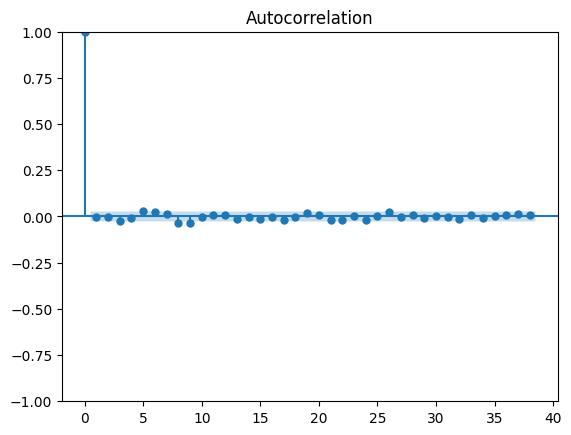

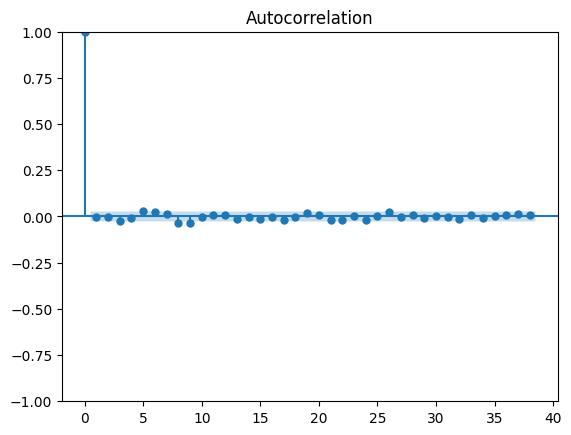

In [115]:
plot_acf(data["Close"].diff().dropna())

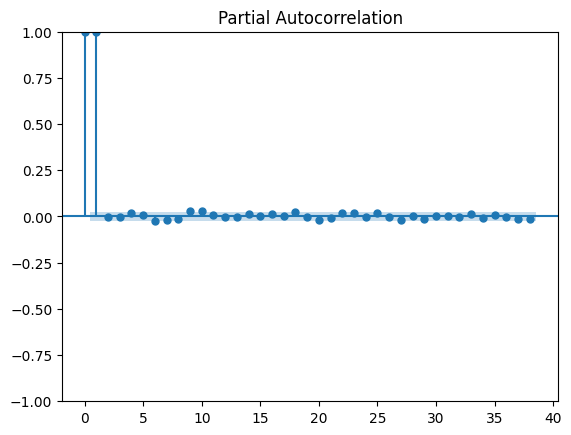

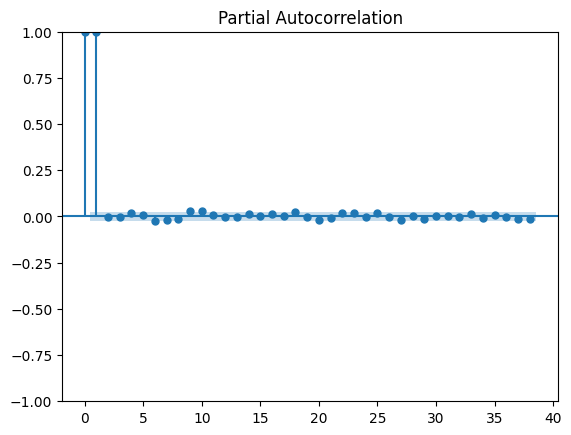

In [36]:
plot_pacf(data["Close"])

In [116]:
result=adfuller(data["Close"].diff().dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("The series is non-stationary, differencing is needed.")
else:
    print("The series is stationary.")

ADF Statistic: -25.197407633129526
p-value: 0.0
The series is stationary.


In [79]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(data["Close"].diff().dropna(), lags=[10], return_df=True)
print(lb_test)

      lb_stat  lb_pvalue
10  25.754737   0.004084


In [80]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Close"], order=(2, 1, 2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5306
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -29946.018
Date:                Sun, 22 Dec 2024   AIC                          59902.037
Time:                        21:25:44   BIC                          59934.919
Sample:                             0   HQIC                         59913.527
                               - 5306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0675     12.834      0.005      0.996     -25.088      25.223
ar.L2          0.8112     11.918      0.068      0.946     -22.547      24.170
ma.L1         -0.0737     12.847     -0.006      0.9

there is no normally disrtubution and seasonality and trends occurs in given dataset


---


metrics analysis:

---




skewness and kurtosis is no signifiant value and too much
same for JB and prob(JB) is 0 which bad so hence proved is there is no prediction using ARIMA  

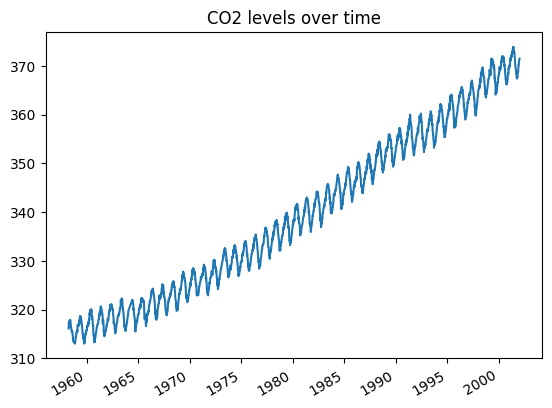

In [81]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
data = sm.datasets.co2.load_pandas().data
data = data.dropna()
data['co2'].plot()
plt.title("CO2 levels over time")
plt.show()

In [82]:
Ar_model=AutoReg(data["co2"],lags=5).fit()

In [83]:
Ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    co2   No. Observations:                 2225
Model:                     AutoReg(5)   Log Likelihood               -1440.910
Method:               Conditional MLE   S.D. of innovations              0.463
Date:                Sun, 22 Dec 2024   AIC                           2895.820
Time:                        21:26:05   BIC                           2935.757
Sample:                             5   HQIC                          2910.407
                                 2225                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2480      0.197      1.256      0.209      -0.139       0.635
co2.L1         0.9701      0.021     46.584      0.000       0.929       1.011
co2.L2         0.1476      0.029      5.059      0.000       0.090       0.205
co2.L3         0.1730      0.029      5.941      0.000       0.116       0.230
co2.L4        -0.1112      0.029     -3.813      0.000      -0.168      -0.054
co2.L5        -0.1802      0.021     -8.659      0.000      -0.221      -0.139
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0016           -0.0000j            1.0016           -0.0000
AR.2            1.1938           -0.0000j            1.1938           -0.0000
AR.3           -0.4220           -1.4764j            1.5355           -0.2943
AR.4           -0.4220           +1.4764j            1.5355            0.2943
AR.5           -1.9686           -0.0000j            1.9686           -0.5000
-----------------------------------------------------------------------------
"""

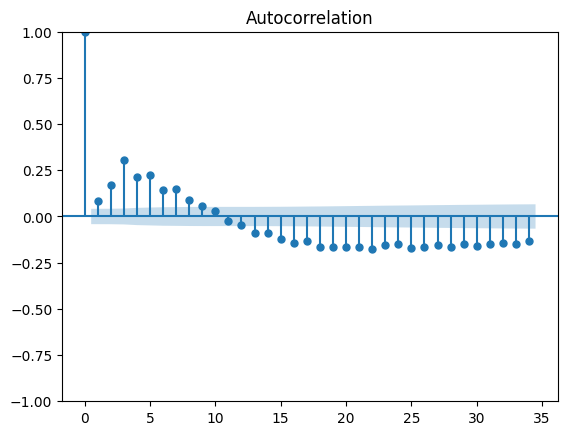

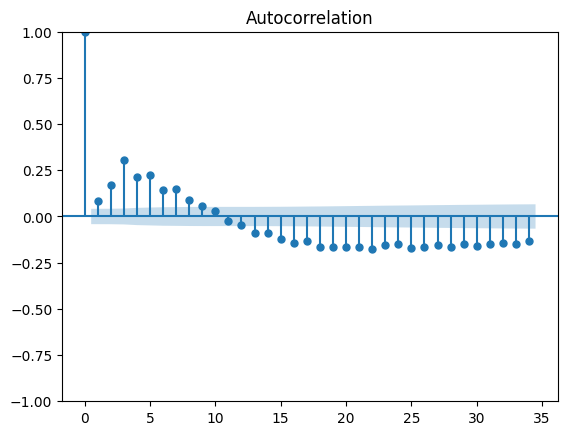

In [84]:
plot_acf(data["co2"].diff().dropna())

In [91]:
data.head()

,co2,co2_diff
1958-03-29,316.1,NaN
1958-04-05,317.3,1.2
1958-04-12,317.6,0.3
1958-04-19,317.5,-0.1
1958-04-26,316.4,-1.1


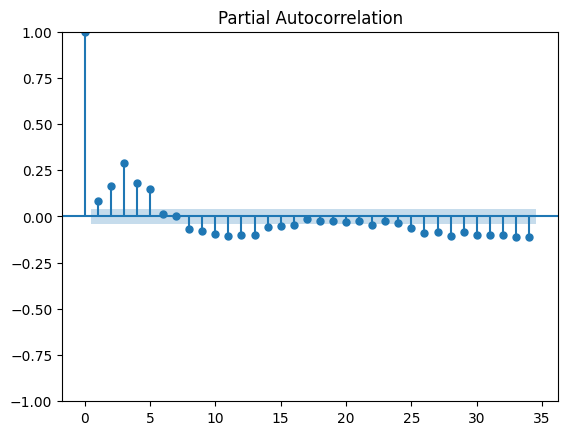

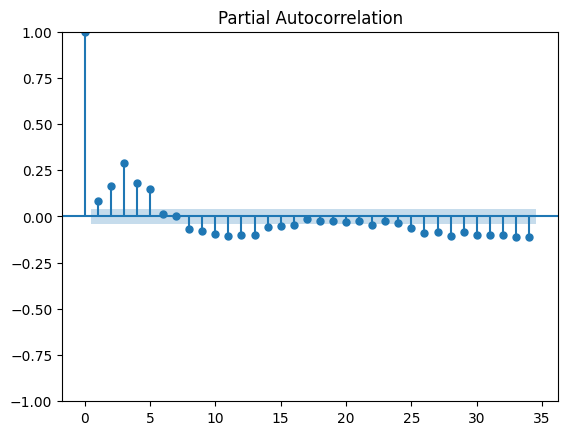

In [47]:
plot_pacf(data["co2"].diff().dropna())

In [85]:
result=adfuller(data["co2"].diff().dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("The series is non-stationary, differencing is needed.")
else:
    print("The series is stationary.")

ADF Statistic: -15.717215758940233
p-value: 1.3373177198382054e-28
The series is stationary.


In [86]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(data["co2"].diff().dropna(), lags=[10], return_df=True)
print(lb_test)

      lb_stat      lb_pvalue
10  629.68036  7.661815e-129


In [87]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
data["co2"] = pd.to_numeric(data["co2"], errors='coerce')
data.dropna(subset=["co2"], inplace=True)
data["co2_diff"] = data["co2"].diff().dropna()
model = ARIMA(data["co2"], order=(10, 2, 7))  # ARIMA(p=2, d=1, q=2)
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                 2225
Model:                ARIMA(10, 2, 7)   Log Likelihood               -1457.451
Date:                Sun, 22 Dec 2024   AIC                           2950.903
Time:                        21:26:42   BIC                           3053.622
Sample:                             0   HQIC                          2988.418
                               - 2225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6530      0.514     -1.270      0.204      -1.661       0.355
ar.L2         -0.0864      0.526     -0.164      0.869      -1.117       0.944
ar.L3          0.5757      0.468      1.229      0.2

In [105]:
forecast_steps = 10
forecast_values = results.forecast(steps=forecast_steps)
print(f"Forecasted values for the next {forecast_steps} steps: {forecast_values}")

Forecasted values for the next 20 steps: 2225    371.751350
2226    371.922548
2227    372.029374
2228    372.086668
2229    372.107610
2230    372.103362
2231    372.082987
2232    372.053532
2233    372.020238
2234    371.986792
2235    371.955610
2236    371.928109
2237    371.904952
2238    371.886263
2239    371.871810
2240    371.861141
2241    371.853693
2242    371.848873
2243    371.846107
2244    371.844876
Name: predicted_mean, dtype: float64


In [108]:
last_co2 = data['co2'].iloc[-1]
forecasted_co2 = [forecast_values.iloc[0]]

for i in range(1, len(forecast_values)):
    forecasted_co2.append( forecast_values.iloc[i])
forecast_dates = pd.date_range(start=data['date'].iloc[-1] + pd.Timedelta(days=7), periods=forecast_steps, freq='7D')

forecast_df = pd.DataFrame({
    'date': forecast_dates,
    'co2': forecasted_co2
})

fig = go.Figure()

fig.add_trace(go.Scatter(x=data['date'], y=data['co2'], mode='lines+markers', name='Original CO2'))

fig.add_trace(go.Scatter(x=forecast_df['date'], y=forecast_df['co2'], mode='lines+markers', name='Forecasted CO2', line=dict(color='red', dash='dash')))

fig.update_layout(title="CO2 Predictions",
                  xaxis_title="Date",
                  yaxis_title="CO2 Level",
                  showlegend=True)

fig.show()